<a href="https://colab.research.google.com/github/khljgkjpp52/tibaml0315/blob/main/classification_%E9%B3%B6%E5%B0%BE%E8%8A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

latex math用法

$ Area = \frac{1}{2+x}π{R^2} $

### 這門課常用的函式庫
1. scikit-learn：sklearn 機器學習
2. pandas：表格處理
3. numpy：多為陣列函式庫
4. opencv：影像處理、AI函式庫
5. Pillow(PIL)：影像處理
6. matplotlib：視覺化基礎函式庫
7. seaborn：視覺化進階函式庫

### 資料量的需求
1. 機器學習：1k~10k 以上
2. 深度學習：10k~100k以上

題目難度 <-> 資料需求
1. 簡單：少點ok
2. 難：多一點

題目難度可以參考欄位數目

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(iris["data"], columns = iris["feature_names"])
y = iris["target"]

total = x[:]
total["ans"] = iris["target"]
total.to_csv("iris.csv", index=False, encoding="utf-8") # index列編號
# SettingWithCopyWarning 報錯忽略它

<ipython-input-13-d46fd26f8148>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total["ans"] = iris["target"]


先把你的資料分成兩分：一份訓練/一份驗證

進到sklearn以前:pd.DataFrame

進到sklearn以後(train_test_split): np.array

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
# 分類的資料會打亂，但打亂的同時也會對應相應的位置
# test_size -> 輸入整數就是選擇幾個當測試資料
# 輸入小數點就是幾成，用幾成比例當測試資料 0.1 -> 1成
# train_test_split([1, 2, 3, 4], test_size=1) 
# train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=1) # test_size -> 選擇幾個當測試

x_np = np.array(x)
y_np = np.array(y)
# 資料提取1成數量出來當訓練完之後的驗證資料 所以train、test各兩份
# 90%xnp, 10%xnp, 90%ynp, 10%ynp
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1) # test_size小數點代表幾成的意思 0.1 -> 1成
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

決策樹每一層的選擇：目標**```確定程度提高最高```** -> Gini(操作機率)降低

一顆決策樹 -> 信心程度100%(Gini=0)

$ Gini = ∑ p_i(1-p_i) $

[Text(0.4, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.664\nsamples = 135\nvalue = [50, 40, 45]\nclass = setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'petal width (cm) <= 1.65\ngini = 0.498\nsamples = 85\nvalue = [0, 40, 45]\nclass = virginica'),
 Text(0.2, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'sepal length (cm) <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.2, 0.25, 'sepal width (cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.4, 0.25, 

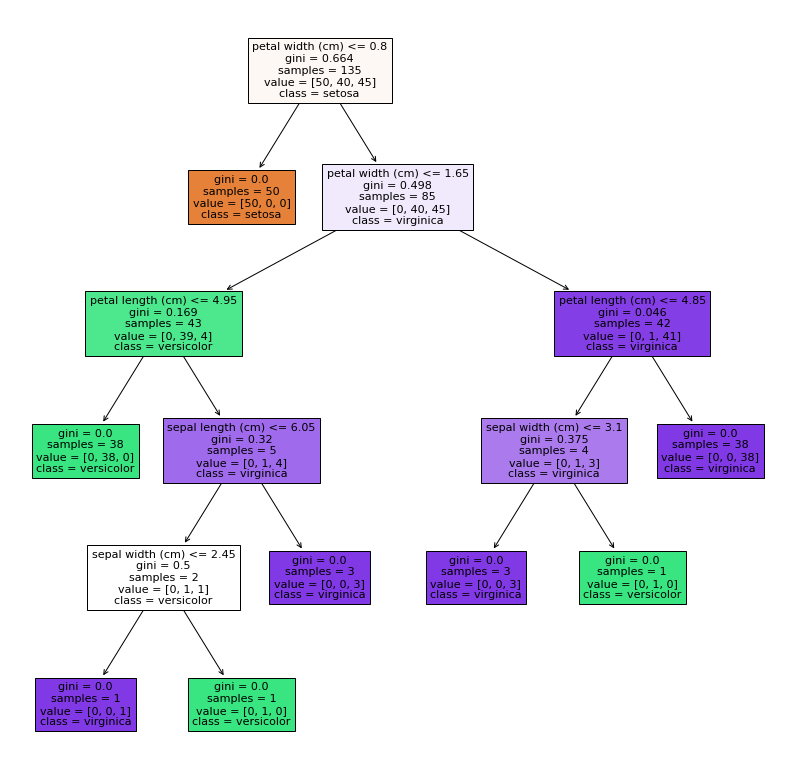

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14,14)) # figsize = 設定圖表大小

# 決策樹 True走左邊 False走右邊
# 設定x欄位名稱
# class名稱設定target_name (鳶尾花種類名稱)
# filles 填顏色
plot_tree(clf,
     feature_names=x.columns, 
     class_names=iris["target_names"],
     filled=True)